# **Finding Outliers & Extreme Values**

---



Identifying and dealing with outliers can be tough, but it is an essential part of the data
analytics process, as well as feature engineering for machine learning. So, how do we find
outliers? Luckily, there are several methods for identifying outliers that are easy to execute
in Python using only a few lines of code.
31
Outliers and Extreme values are the inconsistent values within the dataset. That means the
outlier data points vary greatly from the expected values—either being much larger or
significantly smaller. Outliers and Extreme values can be the result of various issues like
human error in data entry or collection, faulty equipment, poor data sampling or simply these
values can indicate a true anomaly or phenomenon.
A data scientist should use various techniques to visualise and identify outliers before
deciding whether they should be dropped, kept, or modified. Let’s load our prepared dataset.
Drop any unnecessary variables from your data and display the basic stats for the RETAINED
variables. In this case, “ID” and “NewColumn” are unnecessary variables.


count → Number of non-null values.

mean → Average value.

std → Standard deviation (spread of data).

min → Minimum value.

25% → 1st quartile (Q1).

50% → Median (Q2).

75% → 3rd quartile (Q3).

max → Maximum value.

[15, 18, 22, 25, 29, 30, 33, 35, 38, 40, 42, 45]

Q1 (25%) = 22.75 → 25% of the salaries are below this.

Q2 (50%, Median) = 31.5 → Half of the salaries are below this.

Q3 (75%) = 39 → 75% of the salaries are below this.

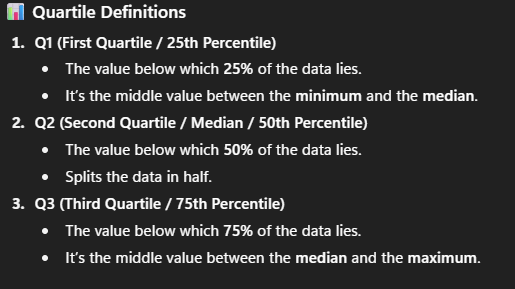

In [17]:
import pandas as pd
#let’s load your prepared dataset
data = pd.read_csv('/content/Prepared_Mall_Customers.csv')
data.describe().transpose()
#We used transpose to make the columns rows and the rows columns to twistthe table

,count,mean,std,min,25%,50%,75%,max
ID,200.0,100.500000,57.879185,1.0,50.75,100.5,150.25,200.0
Sex,200.0,0.560000,0.497633,0.0,0.00,1.0,1.00,1.0
Age,197.0,39.000000,14.002915,18.0,29.00,36.0,49.00,70.0
Salary,198.0,61.005051,26.017857,15.0,42.25,62.0,78.00,137.0
Spending_Score,199.0,50.256281,25.876350,1.0,34.50,50.0,73.00,99.0
NewColumn,200.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0


### 1- Using pandas describe() function to find outliers:
After checking the data and
dropping the columns, use .describe() to generate some summary statistics. Generating
summary statistics is a quick way to help us determine whether or not the dataset has
outliers. By looking at the stats, we know that we dropped two variables: “ID” and
“NewColumn”. But why did the “Customer_Satisfaction” variable disappear?


In [ ]:
# Drop unnecessary variables and rename your dataset
df = data.drop(columns=(['ID', 'NewColumn']))
df.describe()

,Sex,Age,Salary,Spending_Score
count,200.000000,197.000000,198.000000,199.000000
mean,0.560000,39.000000,61.005051,50.256281
std,0.497633,14.002915,26.017857,25.876350
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,29.000000,42.250000,34.500000
50%,1.000000,36.000000,62.000000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


### 2- Using data visualisation to find outliers to find outliers:
Several different
visualisations will help us understand the data and the outliers. The type of plot you pick will
depend on the number of variables you’re analysing. These are a few of the most
popular visualization methods for finding outliers in data:


*   Histogram
*   Box plot
*   Scatter plot

#### a) Using a histogram
we can see how the data is distributed. Having data that follows
a normal distribution is necessary for some of the statistical techniques used to detect
outliers.

In [4]:
import plotly.express as px
Salary_fig = px.histogram(data, x='Salary')
Salary_fig.show()

#### b) Using a box plot
A box plot allows us to identify the univariate outliers, or outliers for
one variable. Box plots are useful because they show minimum and maximum values, the
median, and the interquartile range of the data. In the chart, the outliers are shown as points,
which makes them easy to see. Let’s plot the box plot for “Age ” and “Salary”.


In [5]:
Age_fig = px.box(data, x='Age')
Age_fig.show()

In [7]:
Salary_fig = px.box(data, x='Salary')
Salary_fig.show()

#### C) Using a scatter plot
Using a Scatter plot, it is possible to review multivariate outliers, or
the outliers that exist in two or more variables.


In [9]:
Age_Salary_Scatter_fig = px.scatter(x=data['Age'], y=data['Salary'])
Age_Salary_Scatter_fig.show()

### 3- Using IQR statistical method to find outliers

Since the data doesn’t
follow a normal distribution, we will calculate the outlier data points using the statistical
method called interquartile range (IQR). Using the IQR, the outlier data points are the ones
falling below Q1–1.5 IQR or above Q3 + 1.5 IQR. Q1 is the 25th percentile, Q3 is the 75th
percentile of the dataset, and IQR represents the interquartile range calculated by Q3 minus
Q1 (Q3–Q1).

Using the convenient pandas .quantile() function, we can create a simple Python
function that takes in our column from the data frame and outputs the outliers:


In [10]:
def find_outliers_IQR(df):
 q1=df.quantile(0.25)
 q3=df.quantile(0.75)
 IQR=q3-q1
 outliers = df[((df<(q1-1.5*IQR))|(df>(q3+1.5*IQR)))]
 return outliers

Notice using .quantile() we can define Q1 and Q3. Next, we calculate IQR, and then we use the
values to find the outliers in the data frame. Since it takes a data frame, we can input one or
multiple columns at a time. Let’s find the outlier customers in “Salary”


In [12]:
outliers = find_outliers_IQR(data['Salary'])
print("number of outliers: "+ str(len(outliers)))
outliers

number of outliers: 2


,Salary
198,137.0
199,137.0


Using the IQR method, we find 2 Salary outliers in the dataset. Their indexes are 198 and 199. If you decide to drop
these two outliers, you can use the drop function to drop the two outlier customers.

In [13]:
data.drop(data.index[[199,198]], inplace=True)

To verify the successful removal of outliers, check for outliers again in the same variable or
you can check the maximum Salary value in the summary stats again to make sure we no
longer see $137k as a maximum value

In [14]:
outliers = find_outliers_IQR(data['Salary'])
print("number of outliers: "+ str(len(outliers)))
outliers

number of outliers: 0


,Salary


In [15]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,198.0,99.500000,57.301832,1.0,50.25,99.5,148.75,198.0
Sex,198.0,0.565657,0.496927,0.0,0.00,1.0,1.00,1.0
Age,195.0,39.082051,14.050844,18.0,28.50,36.0,49.00,70.0
Salary,196.0,60.229592,24.980676,15.0,42.00,61.5,78.00,126.0
Spending_Score,197.0,50.253807,25.799987,1.0,35.00,50.0,73.00,99.0
NewColumn,198.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
